In [10]:
!pip install ta

  Using cached ta-0.5.25.tar.gz (20 kB)
  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24884 sha256=436ecd3425ac0aaed57ef2e139a7890fe0536db4e24937d89bec6abd5c96b2c3
  Stored in directory: c:\users\da\appdata\local\pip\cache\wheels\58\89\b5\823b076c3794cc16e7cd6a76e5358ed03140e10ff93e46d8e2
Successfully built ta


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataSet
stock = pd.read_csv('stocks/2GO.csv')
# reate dataFrame
df = pd.DataFrame(stock)
# convert chart_date to date and rename to date
df['date'] = df['chart_date'].apply(pd.to_datetime)
df.head()

,chart_date,open,high,low,close,value,date
0,"Aug 04, 2009 00:00:00",1.28,1.28,1.28,1.28,6400.0,2009-08-04
1,"Aug 11, 2009 00:00:00",1.30,1.34,1.28,1.28,1033760.0,2009-08-11
2,"Aug 12, 2009 00:00:00",1.28,1.28,1.28,1.28,25600.0,2009-08-12
3,"Aug 13, 2009 00:00:00",1.32,1.34,1.30,1.34,282840.0,2009-08-13
4,"Aug 14, 2009 00:00:00",1.30,1.30,1.28,1.28,2917600.0,2009-08-14


In [3]:
# default alma settings
window = 9
offset = 0.85
sigma = 6

# this function calculates the weights for ALMA calculation
def alma_weights(window=9, offset=0.85, sigma=6):
    m = int(offset * (window - 1))
    s = (window/sigma)
    k_all = list(range(0, window))
    weights = []
    # this generates a reversed weights
    for k in k_all:
        Wtd = math.exp(-((k-m)**2)/(2*(s**2)))
        weights.append(Wtd)
    return np.array(weights)

In [4]:
# get the alma weights
weights = alma_weights()
weights

array([3.35462628e-04, 3.86592014e-03, 2.85655008e-02, 1.35335283e-01,
       4.11112291e-01, 8.00737403e-01, 1.00000000e+00, 8.00737403e-01,
       4.11112291e-01])

In [5]:
# define reusable function to calculate alma
def calculate_alma(prices=[]):
    weights = alma_weights()
    if len(prices) < 9:
        return None
    else:
        weighted_sum = weights * prices
        alma = weighted_sum.sum() / weights.sum()
        return alma

In [6]:
df['alma'] = df.close.rolling(window=9).apply(calculate_alma)

In [7]:
df.tail(10)

,chart_date,open,high,low,close,value,date,alma
2144,"May 22, 2020 00:00:00",10.08,10.08,9.64,9.64,510300.0,2020-05-22,9.771473
2145,"May 26, 2020 00:00:00",9.55,9.65,8.80,9.58,812461.0,2020-05-26,9.710974
2146,"May 27, 2020 00:00:00",9.58,9.58,8.78,9.20,188314.0,2020-05-27,9.616839
2147,"May 28, 2020 00:00:00",9.00,9.25,8.78,9.25,363533.0,2020-05-28,9.497265
2148,"May 29, 2020 00:00:00",9.25,9.32,9.00,9.25,206782.0,2020-05-29,9.377437
2149,"Jun 01, 2020 00:00:00",9.70,10.16,9.50,9.90,1683427.0,2020-06-01,9.370242
2150,"Jun 02, 2020 00:00:00",9.90,9.90,9.30,9.54,1309080.0,2020-06-02,9.438495
2151,"Jun 03, 2020 00:00:00",9.60,9.60,9.25,9.50,633877.0,2020-06-03,9.525440
2152,"Jun 04, 2020 00:00:00",9.55,9.55,9.25,9.50,859225.0,2020-06-04,9.559989
2153,"Jun 05, 2020 00:00:00",9.55,9.78,9.50,9.64,626673.0,2020-06-05,9.559002


In [8]:
df.to_csv('test_data.csv')

In [11]:
from ta import add_all_ta_features
df = add_all_ta_features(df, "open", "high", "low", "close", "value", fillna=True)

c:\users\da\appdata\local\programs\python\python38-32\lib\site-packages\ta\trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
c:\users\da\appdata\local\programs\python\python38-32\lib\site-packages\ta\trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [12]:
df.tail(10)

,chart_date,open,high,low,close,value,date,alma,volume_adi,volume_obv,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
2144,"May 22, 2020 00:00:00",10.08,10.08,9.64,9.64,510300.0,2020-05-22,9.771473,1.183804e+08,888433617.0,...,28.399519,5.376344,7.619182,-94.623656,1.353618,9.916230,-9.227872,-1.128205,-1.134618,653.12500
2145,"May 26, 2020 00:00:00",9.55,9.65,8.80,9.58,812461.0,2020-05-26,9.710974,1.190590e+08,887621156.0,...,40.674109,35.454545,17.181725,-64.545455,1.079971,9.886070,-6.262231,-0.622407,-0.624352,648.43750
2146,"May 27, 2020 00:00:00",9.58,9.58,8.78,9.20,188314.0,2020-05-27,9.616839,1.190684e+08,887432842.0,...,42.138018,20.792079,20.540990,-79.207921,0.826500,9.802149,-6.313646,-3.966597,-4.047411,618.75000
2147,"May 28, 2020 00:00:00",9.00,9.25,8.78,9.25,363533.0,2020-05-28,9.497265,1.194320e+08,887796375.0,...,45.570566,26.111111,27.452579,-73.888889,0.592676,9.757678,-9.491194,0.543478,0.542007,622.65625
2148,"May 29, 2020 00:00:00",9.25,9.32,9.00,9.25,206782.0,2020-05-29,9.377437,1.195483e+08,888003157.0,...,52.892049,26.404494,24.435895,-73.595506,0.334324,9.725262,-8.415842,0.000000,0.000000,622.65625
2149,"Jun 01, 2020 00:00:00",9.70,10.16,9.50,9.90,1683427.0,2020-06-01,9.370242,1.199054e+08,889686584.0,...,55.460133,62.921348,38.478985,-37.078652,0.213029,9.726738,0.202429,7.027027,6.791121,673.43750
2150,"Jun 02, 2020 00:00:00",9.90,9.90,9.30,9.54,1309080.0,2020-06-02,9.438495,1.196436e+08,888377504.0,...,57.486051,45.238095,44.854646,-54.761905,0.182000,9.715206,-2.153846,-3.636364,-3.704127,645.31250
2151,"Jun 03, 2020 00:00:00",9.60,9.60,9.25,9.50,633877.0,2020-06-03,9.525440,1.199152e+08,887743627.0,...,63.042927,45.569620,51.243021,-54.430380,0.132324,9.711263,-3.061224,-0.419287,-0.420169,642.18750
2152,"Jun 04, 2020 00:00:00",9.55,9.55,9.25,9.50,859225.0,2020-06-04,9.559989,1.204880e+08,888602852.0,...,60.801026,45.569620,45.459112,-54.430380,0.112265,9.706920,-6.862745,0.000000,0.000000,642.18750
2153,"Jun 05, 2020 00:00:00",9.55,9.78,9.50,9.64,626673.0,2020-06-05,9.559002,1.204880e+08,889229525.0,...,62.160030,54.430380,48.523207,-45.569620,0.105618,9.706231,-0.618557,1.473684,1.462931,653.12500


In [13]:
sample_df = pd.DataFrame(df, columns=['date','close','trend_macd_diff','alma'])
sample_df.sample(10)

,date,close,trend_macd_diff,alma
454,2013-02-18,1.81,-0.002359,1.817302
526,2013-06-26,1.72,0.005370,1.835156
468,2013-03-11,1.71,-0.002705,1.734541
1141,2016-04-22,8.20,0.059655,7.614931
1203,2016-07-20,7.73,0.042926,7.408152
1229,2016-08-25,7.25,0.002260,7.231437
711,2014-07-11,2.65,-0.000449,2.636705
2019,2019-11-13,10.22,-0.080095,10.571137
2117,2020-04-14,6.06,0.124846,5.923121
1217,2016-08-09,7.33,-0.010995,7.298853


In [14]:
def is_mama():
    # close must break ALMA line [close > ALMA]
    # MACD is positive [trend_macd_diff > 0]
    return False

In [15]:
sample_df['mama'] = np.where(((df.close > df.alma) & (df.trend_macd_diff > 0)), True, False)

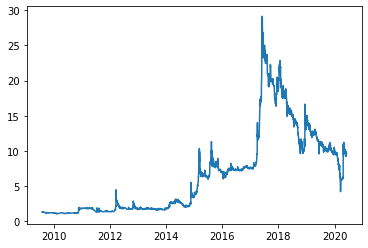

In [16]:
plt.plot('date','close',data=sample_df)

In [17]:
sample_df.truncate(before='01-01-2020')['close'].plot(figsize=(700,700))

MemoryError: In RendererAgg: Out of memory

<Figure size 50400x50400 with 1 Axes>